# Part 1: Data preproccesing

Dataset: https://www.kaggle.com/datasets/adammaus/predicting-churn-for-bank-customers

## Importing libraries

In [1729]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [1730]:

dataset = pd.read_csv('Churn_Modelling.csv')

## Data exploration

In [1731]:
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [1732]:
dataset.shape

(10000, 14)

In [1733]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [1734]:
dataset.select_dtypes(include='object').columns

Index(['Surname', 'Geography', 'Gender'], dtype='object')

In [1735]:
dataset.select_dtypes(include=['int64','float64']).columns

Index(['RowNumber', 'CustomerId', 'CreditScore', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

In [1736]:
# statistical summary

dataset.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


## Dealing with missing Data

In [1737]:
dataset.isnull().values.any()

False

## Encode categorical data

In [1738]:
dataset.select_dtypes(include='object').columns

Index(['Surname', 'Geography', 'Gender'], dtype='object')

In [1739]:
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [1740]:
dataset = dataset.drop(columns=['CustomerId','RowNumber','Surname'])

In [1741]:
dataset.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [1742]:
dataset.select_dtypes(include='object').columns

Index(['Geography', 'Gender'], dtype='object')

In [1743]:
dataset['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [1744]:
dataset['Gender'].unique()

array(['Female', 'Male'], dtype=object)

In [1745]:
dataset.groupby('Geography').mean()

C:\Users\arsik\AppData\Local\Temp\ipykernel_31132\3460784336.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  dataset.groupby('Geography').mean()


,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
Geography,,,,,,,,,
France,649.668329,38.511767,5.004587,62092.636516,1.530913,0.706621,0.516753,99899.180814,0.161548
Germany,651.453567,39.771622,5.009964,119730.116134,1.519729,0.713830,0.497409,101113.435102,0.324432
Spain,651.333872,38.890997,5.032297,61818.147763,1.539362,0.694792,0.529673,99440.572281,0.166734


In [1746]:
dataset.groupby('Gender').mean()

C:\Users\arsik\AppData\Local\Temp\ipykernel_31132\1649157668.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  dataset.groupby('Gender').mean()


,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
Gender,,,,,,,,,
Female,650.831389,39.238389,4.966102,75659.369139,1.544134,0.702619,0.502751,100601.541382,0.250715
Male,650.276892,38.658237,5.051677,77173.974506,1.518600,0.707898,0.525380,99664.576931,0.164559


In [1747]:
#one hot encoding
dataset = pd.get_dummies(data=dataset, drop_first=True)

In [1748]:
dataset.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


## Countplot

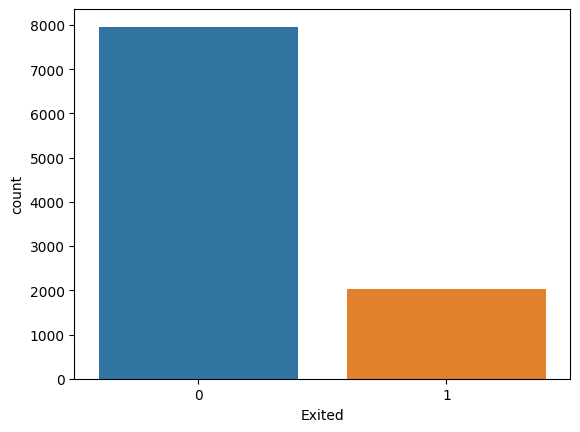

In [1749]:
sns.countplot(dataset, x = 'Exited')
plt.show()

## Correlation matrix and heatmap

In [1750]:
dataset_2 = dataset.drop(columns='Exited')

<Axes: title={'center': 'Correlated with Exited'}>

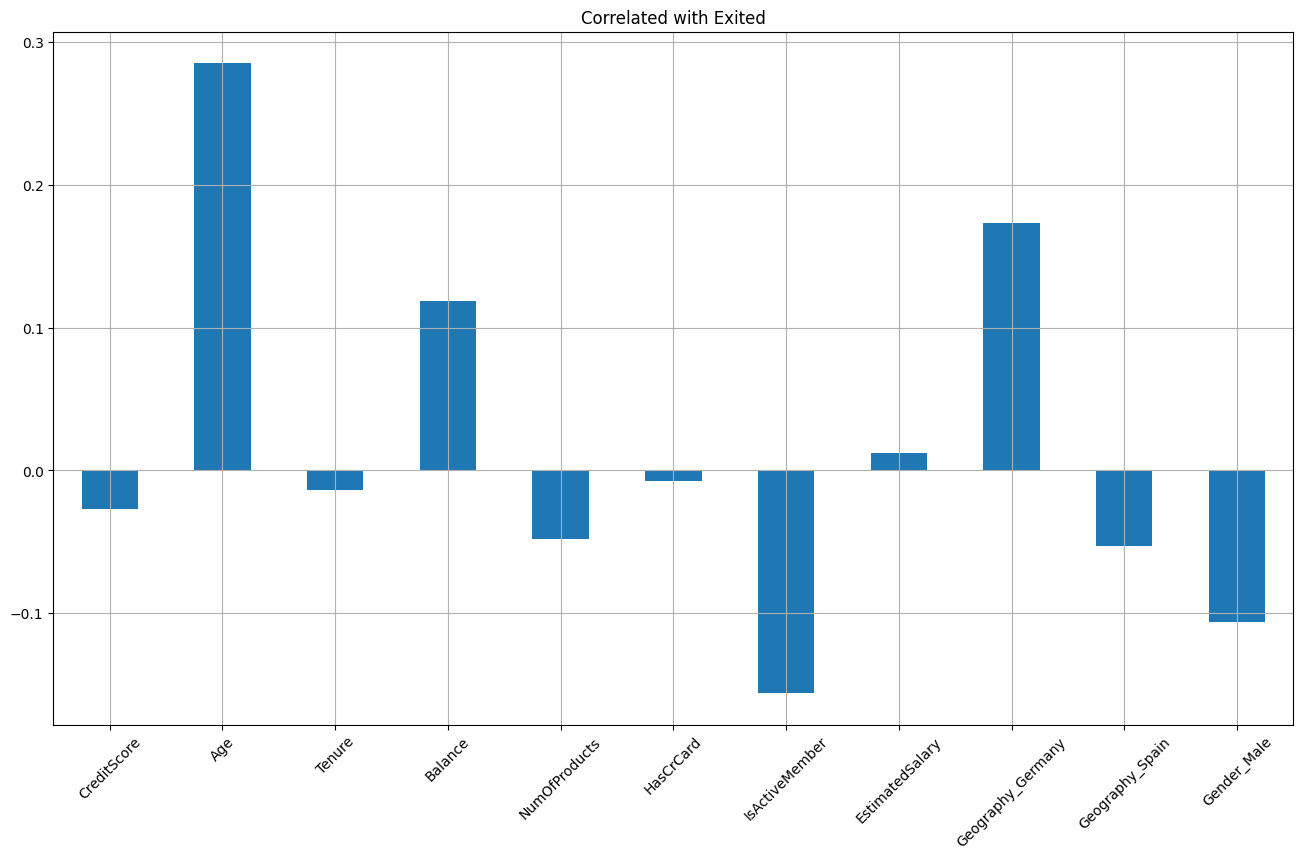

In [1751]:
dataset_2.corrwith(dataset['Exited']).plot.bar(
    figsize=(16,9), title = 'Correlated with Exited', rot=45, grid=True
)

In [1752]:
corr = dataset.corr()

corr

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
CreditScore,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094,0.005538,0.004780,-0.002857
Age,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323,0.046897,-0.001685,-0.027544
Tenure,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001,-0.000567,0.003868,0.014733
Balance,0.006268,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533,0.401110,-0.134892,0.012087
NumOfProducts,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820,-0.010419,0.009039,-0.021859
HasCrCard,-0.005458,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138,0.010577,-0.013480,0.005766
IsActiveMember,0.025651,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128,-0.020486,0.016732,0.022544
EstimatedSalary,-0.001384,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097,0.010297,-0.006482,-0.008112
Exited,-0.027094,0.285323,-0.014001,0.118533,-0.047820,-0.007138,-0.156128,0.012097,1.000000,0.173488,-0.052667,-0.106512
Geography_Germany,0.005538,0.046897,-0.000567,0.401110,-0.010419,0.010577,-0.020486,0.010297,0.173488,1.000000,-0.332084,-0.024628


<Axes: >

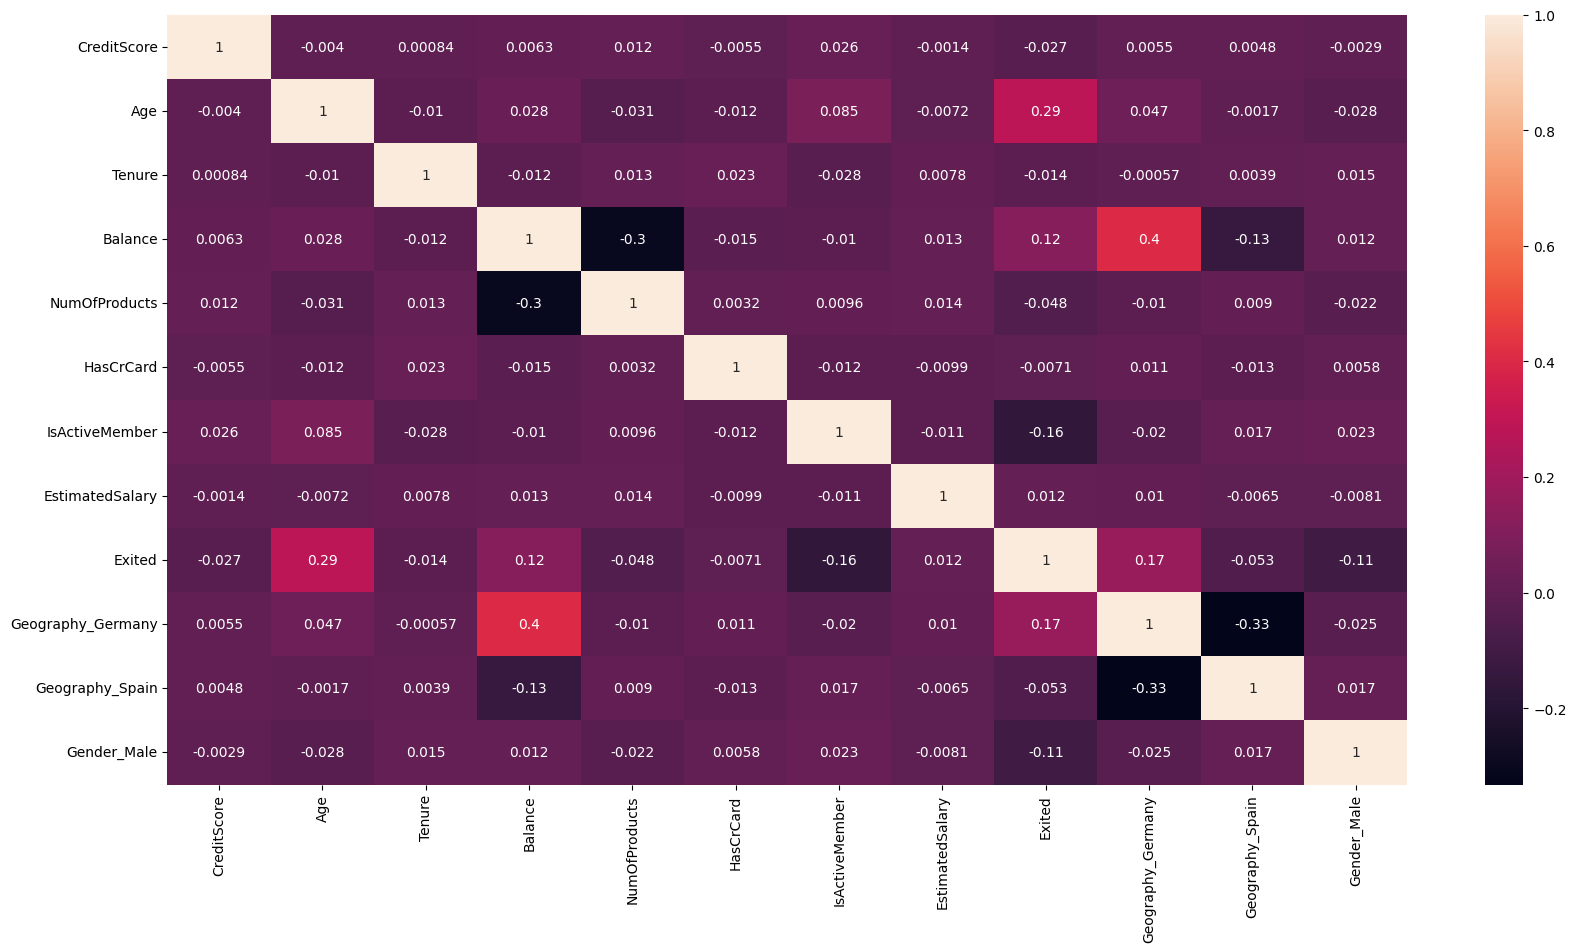

In [1753]:
plt.figure(figsize=(20,10))
sns.heatmap(corr, annot=True)

## Splitting the dataset

In [1754]:
dataset.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


In [1755]:
#independent variables / Matrix of features
x = dataset.drop(columns = 'Exited')

In [1756]:
#dependent variables / target variable
y = dataset['Exited']

In [1757]:
from sklearn.model_selection import train_test_split

In [1758]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [1759]:
x_train.shape


(8000, 11)

In [1760]:
x_test.shape


(2000, 11)

In [1761]:
y_train.shape


(8000,)

In [1762]:
y_test.shape

(2000,)

# Feature scaling

In [1763]:
from sklearn.preprocessing import StandardScaler

In [1764]:
sc = StandardScaler()

In [1765]:
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

# Part 2: Building the model

## Logistic regression

In [1766]:
from sklearn.linear_model import LogisticRegression


In [1767]:
classifier_lr = LogisticRegression(random_state=0)


In [1768]:
classifier_lr.fit(x_train, y_train.values.ravel())
y_pred = classifier_lr.predict(x_test)


In [1769]:
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, precision_score, recall_score


In [1770]:
acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)


In [1771]:
results = pd.DataFrame([['Logistic Regression', acc, f1, prec, rec]],
                       columns = ['Model', 'Accuracy', 'F1 Scrore', 'Precision', 'Recall'])
results


,Model,Accuracy,F1 Scrore,Precision,Recall
0,Logistic Regression,0.811,0.336842,0.581818,0.237037


In [1772]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[1526   69]
 [ 309   96]]


### Cross validation

In [1773]:
from sklearn.model_selection import cross_val_score


In [1774]:
accuracies = cross_val_score(estimator=classifier_lr, X=x_train, y=y_train.values.ravel(),cv=10)


In [1775]:
print("Accuracy is {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation is {:.2f} %".format(accuracies.std()*100))

Accuracy is 80.84 %
Standard Deviation is 0.88 %


## Random forest 

In [1776]:
from sklearn.ensemble import RandomForestClassifier

classifier_rm = RandomForestClassifier(random_state=0)
classifier_rm.fit(x_train, y_train)
y_pred = classifier_rm.predict(x_test)

In [1777]:
acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)

model_results = pd.DataFrame([['Random forest', acc, f1, prec, rec]],
                       columns = ['Model', 'Accuracy', 'F1 Scrore', 'Precision', 'Recall'])

results = pd.concat([results,model_results], ignore_index=True)

results

,Model,Accuracy,F1 Scrore,Precision,Recall
0,Logistic Regression,0.811,0.336842,0.581818,0.237037
1,Random forest,0.867,0.613372,0.745583,0.520988


In [1778]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[1523   72]
 [ 194  211]]


### Cross validation

In [1779]:
from sklearn.model_selection import cross_val_score

accuracies = cross_val_score(estimator=classifier_rm, X=x_train, y=y_train, cv=10)

print("Accuracy is {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation is {:.2f} %".format(accuracies.std()*100))

Accuracy is 85.96 %
Standard Deviation is 1.02 %


## XGBoost

In [1780]:
from xgboost import XGBClassifier

classifier_xgb = XGBClassifier(base_score = 0.5, booster='gbtree',colsample_bylevel=1, colsample_bynode=1,colsample_bytree=1, gamma=0, min_child_weight=1, learning_rate=0.1,max_delta_step=0)
classifier_xgb.fit(x_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None, max_delta_step=0,
              max_depth=None, max_leaves=None, min_child_weight=1, missing=nan,
              monotone_constraints=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, predictor=None, random_state=None, ...)

In [1781]:
y_pred = classifier_xgb.predict(x_test)

In [1782]:
acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)

model_results = pd.DataFrame([['XGBoost', acc, f1, prec, rec]],
                       columns = ['Model', 'Accuracy', 'F1 Scrore', 'Precision', 'Recall'])

results = pd.concat([results, model_results], ignore_index=True)

results

,Model,Accuracy,F1 Scrore,Precision,Recall
0,Logistic Regression,0.811,0.336842,0.581818,0.237037
1,Random forest,0.867,0.613372,0.745583,0.520988
2,XGBoost,0.866,0.614943,0.735395,0.528395


In [1783]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[1518   77]
 [ 191  214]]


### Cross validation

In [1784]:
from sklearn.model_selection import cross_val_score

accuracies = cross_val_score(estimator=classifier_xgb, X=x_train, y=y_train, cv=10)

print("Accuracy is {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation is {:.2f} %".format(accuracies.std()*100))

Accuracy is 86.00 %
Standard Deviation is 1.02 %


# Part 3: Randomized Search to find the best parameters(XGBoost)

In [1785]:
from sklearn.model_selection import RandomizedSearchCV
parameters = {'penalty':['l1', 'l2', 'elasticnet', 'none'],
              'C':[0.25, 0.5, 0.75, 1.0, 1.25, 1.5, 1.75, 2.0],
              'solver': ['newton-cg','lbfgs','liblinear','sag','saga']
}
parameters



{'penalty': ['l1', 'l2', 'elasticnet', 'none'],
 'C': [0.25, 0.5, 0.75, 1.0, 1.25, 1.5, 1.75, 2.0],
 'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}

In [1786]:
random_search = RandomizedSearchCV(estimator=classifier_lr, param_distributions=parameters, n_iter=10, scoring='roc_auc', n_jobs=-1, cv=10, verbose=3)

In [1787]:
random_search.fit(x_train, y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


C:\Users\arsik\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
40 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\arsik\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\arsik\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-pac

RandomizedSearchCV(cv=10, estimator=LogisticRegression(random_state=0),
                   n_jobs=-1,
                   param_distributions={'C': [0.25, 0.5, 0.75, 1.0, 1.25, 1.5,
                                              1.75, 2.0],
                                        'penalty': ['l1', 'l2', 'elasticnet',
                                                    'none'],
                                        'solver': ['newton-cg', 'lbfgs',
                                                   'liblinear', 'sag',
                                                   'saga']},
                   scoring='roc_auc', verbose=3)

In [1788]:
random_search.best_estimator_


LogisticRegression(C=0.25, random_state=0)

In [1789]:
random_search.best_score_

0.7634116770056544

In [1790]:
random_search.best_params_

{'solver': 'lbfgs', 'penalty': 'l2', 'C': 0.25}

In [1791]:
from sklearn.model_selection import GridSearchCV
parameters = {
    'min_child_weight': [1, 5, 10],
    'gamma': [0.5, 1, 1.5, 2, 5],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'max_depth': [3, 4, 5]
}
parameters_grid = [
    {'penalty': ['l1'], 
     'C':[0.25, 0.5, 0.75, 1.0, 1.25, 1.5, 1.75, 2.0], 
     'solver': ['liblinear', 'saga']},

    {'penalty': ['l2'], 
     'C':[0.25, 0.5, 0.75, 1.0, 1.25, 1.5, 1.75, 2.0], 
     'solver': ['newton-cg','newton-cg','lbfgs', 'liblinear', 'sag', 'saga']},

    {'penalty': ['elasticnet'], 
     'C':[0.25, 0.5, 0.75, 1.0, 1.25, 1.5, 1.75, 2.0], 
     'solver': ['saga']},

    {'penalty': ['none'], 
     'C':[0.25, 0.5, 0.75, 1.0, 1.25, 1.5, 1.75, 2.0], 
     'solver': [ 'newton-cg','lbfgs', 'liblinear', 'sag']},

]
parameters



{'min_child_weight': [1, 5, 10],
 'gamma': [0.5, 1, 1.5, 2, 5],
 'subsample': [0.6, 0.8, 1.0],
 'colsample_bytree': [0.6, 0.8, 1.0],
 'max_depth': [3, 4, 5]}

In [1792]:
grid_search = GridSearchCV(estimator=classifier_xgb, param_grid=parameters, scoring='roc_auc', n_jobs=-1, cv=10, verbose=3)

In [1793]:
grid_search.fit(x_train, y_train)

Fitting 10 folds for each of 405 candidates, totalling 4050 fits


GridSearchCV(cv=10,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     callbacks=None, colsample_bylevel=1,
                                     colsample_bynode=1, colsample_bytree=1,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=0, gpu_id=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=0.1, max_bin=N...
                                     max_depth=None, max_leaves=None,
                                     min_child_weight=1, missing=nan,
                                     monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.6, 0.8, 1.0],
                         'gamma': [0.5, 1, 1.5, 2, 5], 'max_depth': [3, 4, 5],
                         'min_child_weight': [1, 5, 10],
                         'subsample': [0.6, 0.8, 1.0]},
             scoring='roc_auc', verbose=3)

In [1794]:
grid_search.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.6,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=5, gpu_id=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None, max_delta_step=0,
              max_depth=5, max_leaves=None, min_child_weight=1, missing=nan,
              monotone_constraints=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, predictor=None, random_state=None, ...)

In [1795]:
grid_search.best_score_

0.8674542117736946

In [1796]:
grid_search.best_params_

{'colsample_bytree': 0.6,
 'gamma': 5,
 'max_depth': 5,
 'min_child_weight': 1,
 'subsample': 1.0}

# Part 4: Final Model

In [1797]:
from xgboost import XGBClassifier
classifier = XGBClassifier(**grid_search.best_params_)
classifier.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.6, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=5, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [1799]:
y_pred = classifier.predict(x_test)

In [1800]:
acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
model_results = pd.DataFrame([['Final Model', acc, f1, prec, rec]],
                       columns = ['Model', 'Accuracy', 'F1 Scrore', 'Precision', 'Recall'])
results = results.append(model_results, ignore_index = True)
results

C:\Users\arsik\AppData\Local\Temp\ipykernel_31132\4254406023.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(model_results, ignore_index = True)


,Model,Accuracy,F1 Scrore,Precision,Recall
0,Logistic Regression,0.8110,0.336842,0.581818,0.237037
1,Random forest,0.8670,0.613372,0.745583,0.520988
2,XGBoost,0.8660,0.614943,0.735395,0.528395
3,Final Model,0.8675,0.619799,0.739726,0.533333


In [1801]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator=classifier, X=x_train, y=y_train,cv=10)
print("Accuracy is {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation is {:.2f} %".format(accuracies.std()*100))

Accuracy is 86.22 %
Standard Deviation is 1.14 %
